### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep ='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [4]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [5]:
df['effectiveness'].nunique()

5

In [6]:
df['sideEffects'].nunique()

5

In [7]:
df_final = df[['rating','effectiveness','sideEffects']]

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.9+ KB


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [9]:
df_final = pd.get_dummies(df_final,columns=['effectiveness', 'sideEffects'])

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(2, 15)
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


In [12]:
silhouette_scores

[0.32598385476223746,
 0.2775325669308374,
 0.3683517350028513,
 0.4096063478591773,
 0.43827046620961924,
 0.47439434666453456,
 0.5274525588423191,
 0.5771138294374181,
 0.6622064043795459,
 0.6875576479708692,
 0.7337376647918585,
 0.7473142676245099,
 0.7625744246958852]

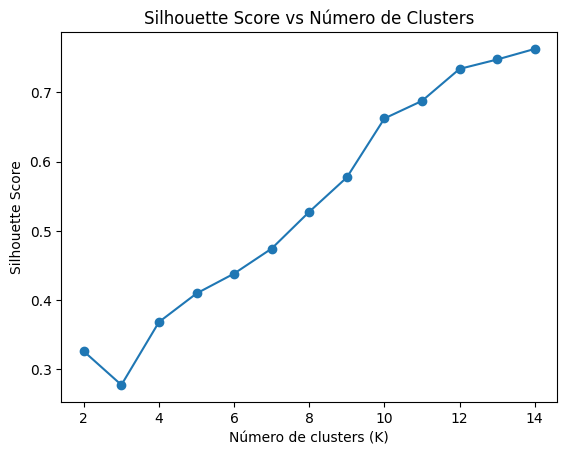

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Número de Clusters")
plt.show()

In [14]:
best_k = ks[silhouette_scores.index(max(silhouette_scores))]
print("Mejor K según silhouette:", best_k)

Mejor K según silhouette: 14


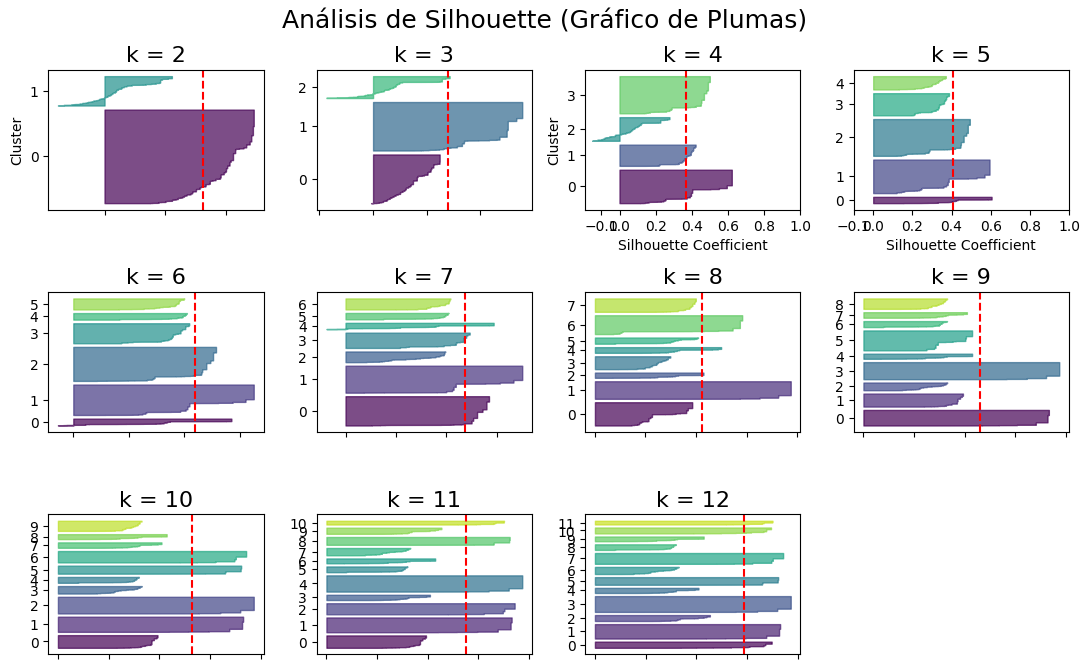

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

plt.figure(figsize=(11, 9))

for idx, k in enumerate((2,3,4,5, 6,7,8,9,10,11,12), start=1):
    plt.subplot(4,4, idx)

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)

    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X_scaled) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.viridis(i / k)
        plt.fill_betweenx(
            np.arange(pos, pos + len(coeffs)),
            0,
            coeffs,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.FixedLocator(ticks))
    ax.yaxis.set_major_formatter(plt.FixedFormatter(range(k)))

    if idx in (1, 3):
        plt.ylabel("Cluster")

    if idx in (3, 4):
        plt.xlabel("Silhouette Coefficient")
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(
        x=silhouette_scores[k - 2],
        color="red",
        linestyle="--"
    )

    plt.title(f"k = {k}", fontsize=16)

plt.suptitle("Análisis de Silhouette (Gráfico de Plumas)", fontsize=18)
plt.tight_layout()
plt.show()

In [26]:
inercia_scores = []
for idx, k in enumerate(range(1,20), start=1):   
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)       
    y_pred = kmeans.fit_predict(X_scaled)
    inercia_score = kmeans.inertia_
    inercia_scores.append(inercia_score)

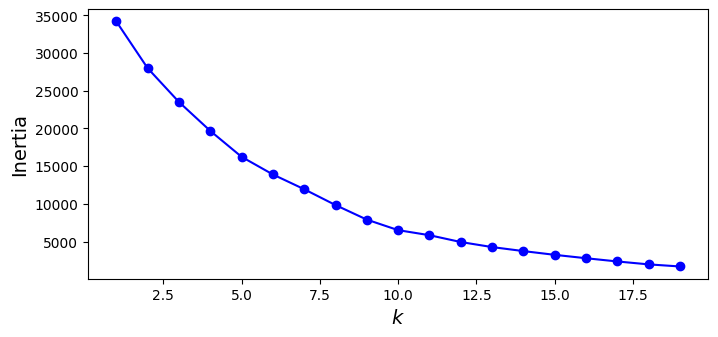

In [27]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1,20), inercia_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

0     175
1     930
2    1019
3     614
4     369
Name: count, dtype: int64


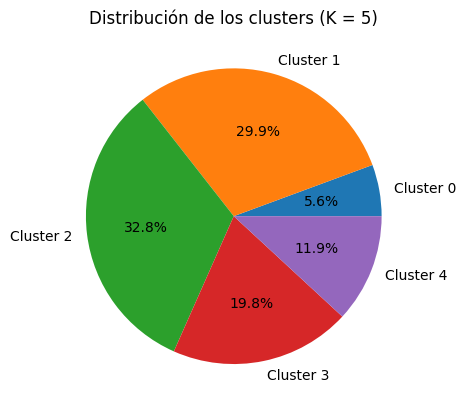

In [35]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
import pandas as pd

cluster_counts = pd.Series(labels).value_counts().sort_index()
print(cluster_counts)

import matplotlib.pyplot as plt

plt.figure()
plt.pie(
    cluster_counts,
    labels=[f"Cluster {i}" for i in cluster_counts.index],
    autopct="%1.1f%%"
)
plt.title("Distribución de los clusters (K = 5)")
plt.show()
